# Descriptive Statistics
- Vistualization Technique
- Measure of Central Tendency
- Measure of spread
- Covarience and Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
df.rename(columns={'SepalLengthCm':'SL', 'SepalWidthCm':'SW', 'PetalLengthCm':'PL', 'PetalWidthCm':'PW',
       'Species':'S'}, inplace=True)

In [4]:
df.head()

,Id,SL,SW,PL,PW,S
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.sample(5)

,Id,SL,SW,PL,PW,S
149,150,5.9,3.0,5.1,1.8,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica


In [5]:
df['S'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: S, dtype: int64

In [6]:
Iris_setosa     =  df[df['S']=="Iris-setosa"]
Iris_versicolor =  df[df['S']=='Iris-versicolor']
Iris_virginica  =  df[df['S']=='Iris-virginica']

## 1.a Mean
<img src="https://www.onlinemathlearning.com/image-files/population-mean.png">

In [38]:
# sepal width
print(np.mean(Iris_setosa["SW"]))
print(np.mean(Iris_versicolor["SW"]))
print(np.mean(Iris_virginica["SW"]))

3.418
2.7700000000000005
2.974


In [39]:
# sepal Lengh
print(np.mean(Iris_setosa["SL"]))
print(np.mean(Iris_versicolor["SL"]))
print(np.mean(Iris_virginica["SL"]))

5.006
5.936
6.587999999999998


## The problem of Ouliers

(array([ 1.,  1.,  2.,  7., 12., 14.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

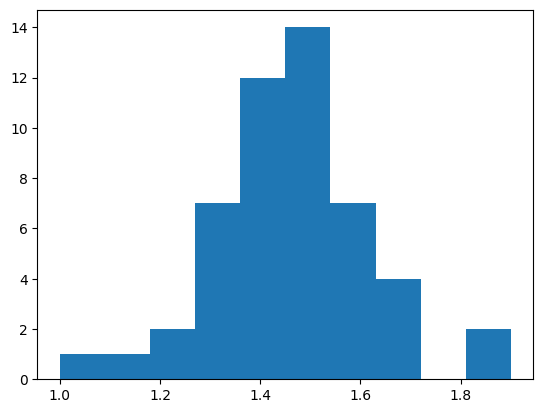

In [7]:
plt.hist(Iris_setosa["PL"])

In [57]:
print(np.mean(Iris_setosa["PL"]))
print(np.mean(np.append(Iris_setosa["PL"],50)))

# The problem with mean is that it will skrew your data towards outliers

1.464
2.4156862745098038


# 2. Median

In [53]:
# sepal width
print(np.median(Iris_setosa["PL"]))
print(np.median(Iris_versicolor["PL"]))
print(np.median(Iris_virginica["PL"]))

1.5
4.35
5.55


In [59]:
# The good thing about median
print(np.median(Iris_setosa["PL"]))
print(np.median(np.append(Iris_setosa["PL"],50)) )

# The problem with mean is that it will skrew your data towards outliers

1.5
1.5


# Mode

In [64]:
from scipy import stats

print(stats.mode(Iris_setosa["PL"]))
print(stats.mode(Iris_versicolor["PL"]))
print(stats.mode(Iris_virginica["PL"]))

ModeResult(mode=array([1.5]), count=array([14]))
ModeResult(mode=array([4.5]), count=array([7]))
ModeResult(mode=array([5.1]), count=array([7]))


# Measue of Central tendency

### Measure of spread gives us an idea of how much the datais spread or varying. Some important measures of spread are:

### 1. Range
### 2. Interquartile Range (IQR)
### 3. Variance
### 4. Standard deviation

# 1. Range
### The range describes the difference between the largest and smallest points in your data.

In [8]:
r = np.max(Iris_setosa['PL']) -  np.min(Iris_setosa["PL"])
print("The range is",r)

The range is 0.8999999999999999


## 2. Percentile
A Percentile is measure used il statistics indicating the value below which a given percentage of observation is group of observations my be found.

In [13]:
mylist=[0,1,2,3,4,5,6,7,8,9]

print(np.percentile(mylist, 25))
print(np.percentile(mylist, 50))
print(np.percentile(mylist, 90))

2.25
4.5
8.1


In [15]:
np.percentile(Iris_setosa["PL"], 95)

1.7

## 3. Quartiles
#### Quartiles are the values that divide a list of number into quaters:

- Put the list of number in order
- Then cut the list into four equal parts
- The Quartiles are at the "cuts


In [16]:
print(np.percentile(mylist, 25))
print(np.percentile(mylist, 50))
print(np.percentile(mylist, 75))
print(np.percentile(mylist, 100))

2.25
4.5
6.75
9.0


### 4. Interquartile Range
- The Interquartile Range (IQR) is measure of statistical Dispersion between upper(75th) and lower(25th) quatiles.


In [19]:
iqr = np.percentile(Iris_setosa["PL"], 75) - np.percentile(Iris_setosa["PL"], 25)
print("The  inter Quartile Range is: " ,iqr)

The  inter Quartile Range is:  0.17500000000000027


## 5. Mean Absolute Deviation
#### The Absolute Deviation from Mean , also called Mean Absolute Deviation (MAD), describe the variation in the data sets. In sense that it tells  the average distance of each data point in the set. 
- $ mae = (\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right | $

# 6.Varinace
#### Variance measure how far are data point spread out from the mean.
##### The variance is computed by finding the difference between every data point and mean,  squaring them , sunning them up and then taking the average of those numbers.

<img src="https://i.stack.imgur.com/aYxIa.jpg">

### The problem with variance is not in same unit of measurement as the original data due squaring.

In [9]:
np.var(Iris_setosa["SL"])

0.12176400000000002

###  7. Variance Vs Mean Absolute Deviation
#### Variance is easy to work with in comparisms to MAD as it works on Squaring (a smooth function) the derivation in comparismto MAD where we use modulus . Mathematically smooth function are easier to work in compare to non smooth function.


<img src="https://unacademy.com/content/wp-content/uploads/sites/2/2022/03/3.1.png">

##  8. Standard Deviation
#### The square root of Variance is called the Standard Deviation.

<img src="https://www.k2analytics.co.in/wp-content/uploads/2020/05/standard-deviation.png">

## 9. Meadian Absolute deviation
- Its the median os all the number obtained from substracting and calculating the absolute value of every observatiopn with median.


### 10. Mean Absolute Deviation is free from the effects of outliers from which standard deviation suffers

In [14]:
from stats.models import robust
robust.mad(np.array[1,2,3,4,5,6,7])

ModuleNotFoundError: No module named 'stats.models'; 'stats' is not a package

## 11.Boxplot

<AxesSubplot: >

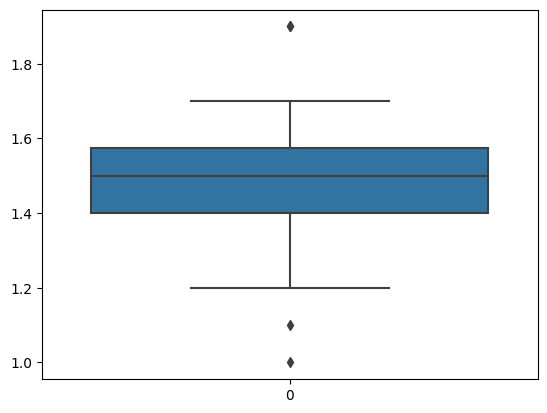

In [12]:
sns.boxplot(Iris_setosa["PL"])

<AxesSubplot: xlabel='S', ylabel='SL'>

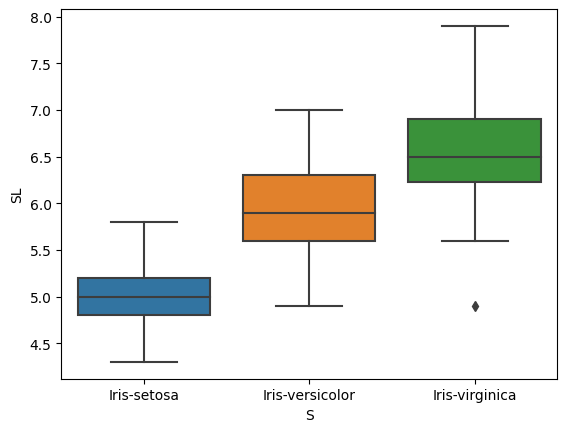

In [17]:
sns.boxplot(x="S", y="SL", data=df)